# Removing missing, duplicate values and outliers from NCHS dataset

In [62]:
import pandas as pd

df=pd.read_csv('NCHS.csv')


In [63]:
# Assuming df is your DataFrame
missing_values = df.isnull().sum()
print(missing_values)


Year                         0
113 Cause Name               0
Cause Name                   0
State                        0
Deaths                      15
Age-adjusted Death Rate    111
dtype: int64


In [64]:
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)
df['Age-adjusted Death Rate'].fillna(df['Age-adjusted Death Rate'].mean(), inplace=True)

df.isnull().sum()

,0
Year,0
113 Cause Name,0
Cause Name,0
State,0
Deaths,0
Age-adjusted Death Rate,0


In [65]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


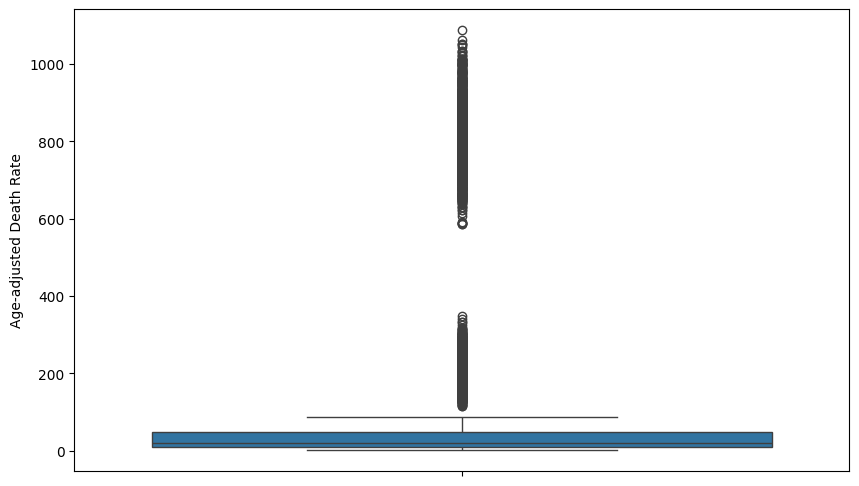

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'column_name' is a numerical column in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age-adjusted Death Rate'])
plt.show()


In [67]:
Q1 = df['Age-adjusted Death Rate'].quantile(0.25)
Q3 = df['Age-adjusted Death Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age-adjusted Death Rate'] < lower_bound) | (df['Age-adjusted Death Rate'] > upper_bound)]
print(outliers)


       Year                 113 Cause Name  Cause Name          State  \
36     2003                     All Causes  All Causes       Colorado   
73     2005                     All Causes  All Causes        Vermont   
146    2006                     All Causes  All Causes          Texas   
183    2010                     All Causes  All Causes         Nevada   
292    2011                     All Causes  All Causes       Missouri   
...     ...                            ...         ...            ...   
11487  2015  Malignant neoplasms (C00-C97)      Cancer       Virginia   
11488  2015  Malignant neoplasms (C00-C97)      Cancer     Washington   
11489  2015  Malignant neoplasms (C00-C97)      Cancer  West Virginia   
11490  2015  Malignant neoplasms (C00-C97)      Cancer      Wisconsin   
11491  2015  Malignant neoplasms (C00-C97)      Cancer        Wyoming   

         Deaths  Age-adjusted Death Rate  
36      29506.0                    792.0  
73       5066.0                    75

In [68]:
#removing outliers rows
df = df[(df['Age-adjusted Death Rate'] >= lower_bound) & (df['Age-adjusted Death Rate'] <= upper_bound)]
print(df)
df.to_csv('NCHS2.csv')

       Year                                     113 Cause Name  \
0      1999  Accidents (unintentional injuries) (V01-X59,Y8...   
1      1999  Accidents (unintentional injuries) (V01-X59,Y8...   
2      1999  Accidents (unintentional injuries) (V01-X59,Y8...   
3      1999  Accidents (unintentional injuries) (V01-X59,Y8...   
4      1999  Accidents (unintentional injuries) (V01-X59,Y8...   
...     ...                                                ...   
15023  2015                               Septicemia (A40-A41)   
15024  2015                               Septicemia (A40-A41)   
15025  2015                               Septicemia (A40-A41)   
15026  2015                               Septicemia (A40-A41)   
15027  2015                               Septicemia (A40-A41)   

                   Cause Name          State  Deaths  Age-adjusted Death Rate  
0      Unintentional Injuries        Alabama  2313.0                     52.2  
1      Unintentional Injuries         Alaska   

# Removing missing, duplicate values and outliers from titanic dataset

In [69]:
import pandas as pd

#importing titanic dataset
df2=pd.read_csv('titanic.csv')


In [70]:
# Assuming df is your DataFrame
missing_values = df2.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(), inplace=True)
df2['Cabin'].fillna(0, inplace=True)


df2.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [72]:
duplicate_rows = df2.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


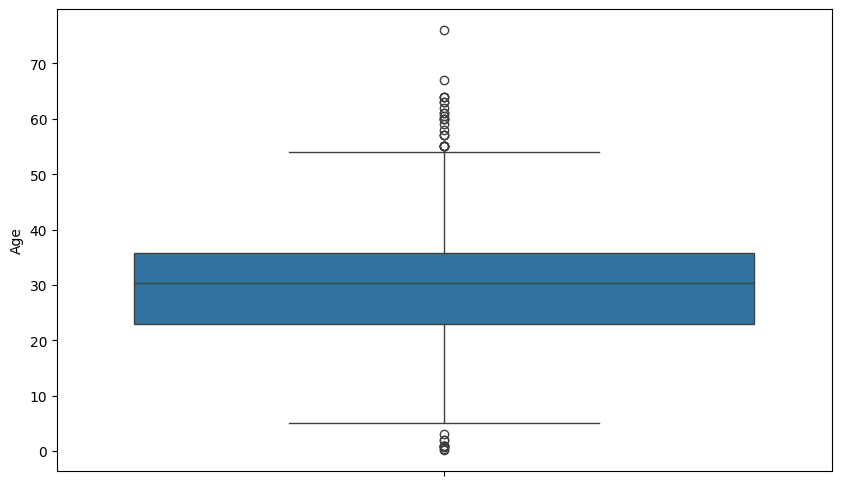

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'column_name' is a numerical column in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(df2['Age'])
plt.show()

In [74]:
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['Age'] < lower_bound) | (df2['Age'] > upper_bound)]
print(outliers.shape)


(36, 12)


In [75]:
#removing outliers rows
df2 = df2[(df3['Age'] >= lower_bound) & (df2['Age'] <= upper_bound)]
print(df2.shape)
df2.to_csv('titanic2.csv')

(382, 12)
